In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import cv2
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import applications, optimizers, Input, Model
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dropout, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_path = "../Dataset/Training_Set/"
validation_path = "../Dataset/Validation_Set/"
test_path = "../Dataset/Test_Set/"

In [8]:
img_height = 224
img_width = 224
batch_size = 64

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, rotation_range=40, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_path, target_size=(img_height, img_width), batch_size=batch_size, shuffle=True, class_mode="categorical")
validation_generator = validation_datagen.flow_from_directory(validation_path, target_size=(img_height, img_width), class_mode="categorical")
test_generator = test_datagen.flow_from_directory(test_path, target_size=(img_height, img_width), class_mode="categorical", batch_size = 1)

Found 5953 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [13]:
basemodel = applications.inception_v3.InceptionV3(weights='imagenet',input_shape=(img_height, img_width, 3), include_top=False)

basemodel.trainable  = False

inputs = Input(shape=(img_height, img_width, 3))

x = basemodel(inputs, training = False)

x = GlobalAveragePooling2D()(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(2, activation='softmax')(x)

model = Model(inputs, output)

model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [14]:
history = model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
68/94 [====================>.........] - ETA: 37s - loss: 0.1757 - accuracy: 0.9311

C:\Anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


94/94 [==============================] - 204s 2s/step - loss: 0.1513 - accuracy: 0.9420 - val_loss: 0.0327 - val_accuracy: 0.9837
Epoch 2/5
94/94 [==============================] - 301s 3s/step - loss: 0.0852 - accuracy: 0.9688 - val_loss: 0.0239 - val_accuracy: 0.9900
Epoch 3/5
94/94 [==============================] - 305s 3s/step - loss: 0.0978 - accuracy: 0.9699 - val_loss: 0.0193 - val_accuracy: 0.9925
Epoch 4/5
94/94 [==============================] - 405s 4s/step - loss: 0.0583 - accuracy: 0.9805 - val_loss: 0.0177 - val_accuracy: 0.9925
Epoch 5/5
94/94 [==============================] - 473s 5s/step - loss: 0.0548 - accuracy: 0.9808 - val_loss: 0.0189 - val_accuracy: 0.9912


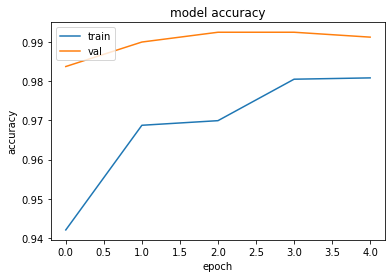

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

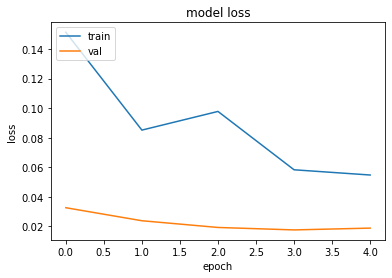

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [17]:
model.trainable = True

model.compile(optimizer = keras.optimizers.Adam(learning_rate=1e-5), loss = "categorical_crossentropy", metrics = ["accuracy"])

model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)               

In [18]:
history1 = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
94/94 [==============================] - 776s 8s/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.0095 - val_accuracy: 0.9937
Epoch 2/10
94/94 [==============================] - 637s 7s/step - loss: 0.0207 - accuracy: 0.9948 - val_loss: 0.0152 - val_accuracy: 0.9937
Epoch 3/10
94/94 [==============================] - 637s 7s/step - loss: 0.0175 - accuracy: 0.9945 - val_loss: 0.0033 - val_accuracy: 0.9987
Epoch 4/10
94/94 [==============================] - 645s 7s/step - loss: 0.0132 - accuracy: 0.9955 - val_loss: 0.0092 - val_accuracy: 0.9987
Epoch 5/10
94/94 [==============================] - 668s 7s/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0088 - val_accuracy: 0.9975
Epoch 6/10
94/94 [==============================] - 680s 7s/step - loss: 0.0037 - accuracy: 0.9990 - val_loss: 0.0056 - val_accuracy: 0.9975
Epoch 7/10
94/94 [==============================] - 666s 7s/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.0027 - val_accuracy: 0.9987
Epoch 8/10
94

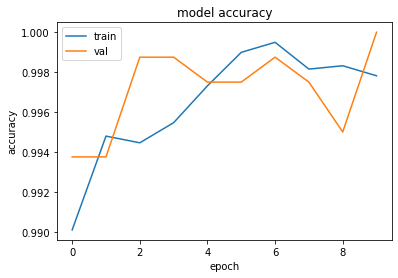

In [19]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

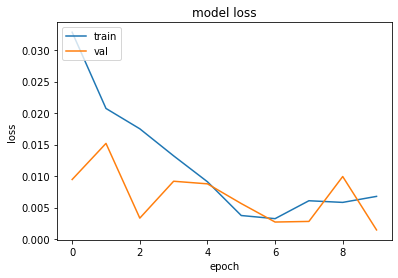

In [20]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [21]:
model_json = model.to_json()

# with open("../Model/model_json.json", "w") as json_file:
#     json_file.write(model_json)

# model.save_weights("../Model/model_weights.h5")

# model.save('../Model/model_hdf5.hdf5')

model.save("../Model/model_inception.h5")

In [22]:
correct = 0
for i in range(800):
    feature = test_generator[i][0]
    label = np.argmax(np.round(test_generator[i][1]))
    pred = np.argmax(np.round(model.predict(feature)))
    if pred == label:
        correct = correct + 1

In [23]:
correct * 100 / 800

100.0